In [1]:
# Start a simplest RNN to predict stock price
# To be continue
import pandas as pd
import numpy as np
#book = pd.read_csv("individual_stocks_5yr/AAL_data.csv")

In [2]:
#data = np.array(book.loc[0:4,"Open":"Volume"])
#data

In [3]:
#a = np.log(data)
#a

In [4]:
#data_2 = np.array(book.loc[1:5,"Open":"Volume"])

In [5]:
#b = np.log(data_2)
#len(b)

In [6]:
#c = b - a 
#c[3]


In [7]:
#c[1:3,:]

In [8]:
import os
nan = 0
good = []

for stock in os.listdir('individual_stocks_5yr'):
    if stock != ".DS_Store":
        book = pd.read_csv("individual_stocks_5yr/" + stock)
        if book.isnull().values.any():
            nan += 1
        else:
            good.append(stock)

print("nan",nan)
print("good", good)

nan 382
good ['AAL_data.csv', 'ADBE_data.csv', 'ADI_data.csv', 'ADP_data.csv', 'ADSK_data.csv', 'AKAM_data.csv', 'ALGN_data.csv', 'ALXN_data.csv', 'AMAT_data.csv', 'AMD_data.csv', 'AMGN_data.csv', 'AMT_data.csv', 'AMZN_data.csv', 'ANSS_data.csv', 'ATVI_data.csv', 'AVGO_data.csv', 'BIIB_data.csv', 'CA_data.csv', 'CBOE_data.csv', 'CELG_data.csv', 'CERN_data.csv', 'CHRW_data.csv', 'CHTR_data.csv', 'CINF_data.csv', 'CMCSA_data.csv', 'CME_data.csv', 'COST_data.csv', 'CSCO_data.csv', 'CSX_data.csv', 'CTAS_data.csv', 'CTSH_data.csv', 'CTXS_data.csv', 'DISCA_data.csv', 'DISCK_data.csv', 'DISH_data.csv', 'DLTR_data.csv', 'EA_data.csv', 'EBAY_data.csv', 'EQIX_data.csv', 'ESRX_data.csv', 'ETFC_data.csv', 'EXPD_data.csv', 'EXPE_data.csv', 'FAST_data.csv', 'FB_data.csv', 'FFIV_data.csv', 'FISV_data.csv', 'FITB_data.csv', 'FLIR_data.csv', 'FOX_data.csv', 'FOXA_data.csv', 'GILD_data.csv', 'GOOGL_data.csv', 'GRMN_data.csv', 'GT_data.csv', 'HAS_data.csv', 'HBAN_data.csv', 'HOLX_data.csv', 'HSIC_data.cs

In [9]:
def process_data(stock):
    
    book = pd.read_csv("individual_stocks_5yr/" + stock)
    lenght = book.shape[0]
    previous = np.array(book.loc[0:lenght-2,"Open":"Volume"])
    current = np.array(book.loc[1:lenght-1,"Open":"Volume"])
    
    log_return  = 100 * (np.log(current) - np.log(previous)) 
    
    #print("log",log_return)
    index = 0
    price_graphs = []
    total_data = len(log_return)
    while index+time_steps < total_data:
        #mov = 1 if close_price[index+time_steps] > close_price[index+time_steps-1] else 0
        #mov = 1 if close_price[index+time_steps] > 0 else 0
        mov = 1 if log_return[index+time_steps,3] > 0 else 0 # 3 is the close price column
        price_graphs.append((log_return[index:index + time_steps,:], mov))
        index += 1
    
    num_train = int(3 * len(price_graphs) / 4)
    train_set = price_graphs[:num_train]
    test_set = price_graphs[num_train:]
    test_batch_x = []
    test_batch_y = []
    for x,y in test_set:
        test_batch_x.append(x)
        test_batch_y.append(y)
    test_batch_x = np.array(test_batch_x).reshape((len(test_set), time_steps, input_size))
    test_batch_y = np.array(test_batch_y).reshape(len(test_set),1)

    return train_set, test_batch_x, test_batch_y

In [10]:
"""
close_price = book['Close']
print(len(close_price) )
length = len(close_price)
print(close_price[1])
book.iloc[0:2,1:5]
"""

"\nclose_price = book['Close']\nprint(len(close_price) )\nlength = len(close_price)\nprint(close_price[1])\nbook.iloc[0:2,1:5]\n"

In [11]:
import matplotlib.pyplot as plt
#plt.plot(close_price)
#plt.show()

First, I predict next day's percentage change, I found loss decrease obviously, 
then I predict next day's price, I found the LSTM can return a very similar trend, 
then I predict next day's price movement either up or down as a binary classification. Initially, I label down as -1, and use a tanh as activation function and sum of square error between logits and labels as loss function, I found the error does converge down. Then I decide to use cross entropy as loss function and realized that I have to change activation function to sigmoid because log can not have negetive function. The error then decrease nicely, and I also found if change the activation funtion from default tanh to relu will improve the result, it might correlated to the value of label.
Then, i use percentage change to predict next's day movement, I did not see a real difference from the performance acheieved by raw price value.

In [12]:
time_steps = 10 # using a truncated size of 5
hidden_units = 50 # hidden unit cells
input_size = 5 # using previous 5 days' percentage change close,open,high,low,volume to predict 6th close
eta = 1 # learning rate
n_classes = 1 # output size

In [13]:
def next_batch(ite, batch_size, data_set):
    batch_x = []
    batch_y = []
    current_batch = data_set[ite*batch_size:(ite+1)*batch_size]
    for x,y in current_batch:
        batch_x.append(x)
        batch_y.append(y)
    return np.array(batch_x), np.array(batch_y).reshape(batch_size,1)

epoch 0 iter  0, loss: 759.74, accu: 0.53
epoch 0 iter  10, loss: 688.95, accu: 0.54
epoch 0 iter  20, loss: 616.99, accu: 0.55
epoch 0 iter  30, loss: 566.88, accu: 0.56
epoch 0 iter  40, loss: 523.62, accu: 0.54
epoch 0 iter  50, loss: 478.92, accu: 0.55
epoch 0 iter  60, loss: 439.70, accu: 0.56
epoch 0 iter  70, loss: 415.23, accu: 0.53
epoch 0 iter  80, loss: 396.60, accu: 0.51
epoch 0 iter  90, loss: 382.45, accu: 0.50
epoch 0 iter  100, loss: 375.07, accu: 0.50
epoch 0 iter  110, loss: 368.63, accu: 0.49
epoch 0 iter  120, loss: 364.21, accu: 0.49
epoch 0 iter  130, loss: 358.20, accu: 0.49
epoch 1 iter  0, loss: 352.73, accu: 0.49
epoch 1 iter  10, loss: 346.78, accu: 0.49
epoch 1 iter  20, loss: 342.69, accu: 0.50
epoch 1 iter  30, loss: 336.82, accu: 0.50
epoch 1 iter  40, loss: 331.00, accu: 0.49
epoch 1 iter  50, loss: 326.43, accu: 0.49
epoch 1 iter  60, loss: 322.61, accu: 0.50
epoch 1 iter  70, loss: 321.24, accu: 0.52
epoch 1 iter  80, loss: 321.11, accu: 0.52
epoch 1 i

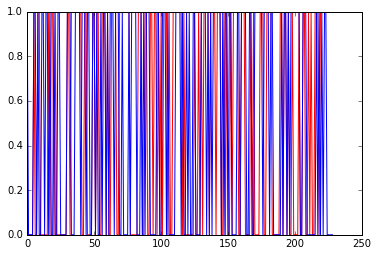

epoch 0 iter  0, loss: 314.13, accu: 0.50
epoch 0 iter  10, loss: 313.43, accu: 0.52
epoch 0 iter  20, loss: 311.47, accu: 0.52
epoch 0 iter  30, loss: 306.04, accu: 0.53
epoch 0 iter  40, loss: 302.33, accu: 0.54
epoch 0 iter  50, loss: 299.74, accu: 0.53
epoch 0 iter  60, loss: 296.33, accu: 0.53
epoch 0 iter  70, loss: 294.05, accu: 0.51
epoch 0 iter  80, loss: 290.60, accu: 0.50
epoch 0 iter  90, loss: 288.56, accu: 0.50
epoch 0 iter  100, loss: 286.17, accu: 0.52
epoch 0 iter  110, loss: 286.11, accu: 0.52
epoch 0 iter  120, loss: 285.09, accu: 0.52
epoch 0 iter  130, loss: 284.98, accu: 0.53
epoch 0 iter  140, loss: 286.93, accu: 0.54
epoch 0 iter  150, loss: 283.37, accu: 0.54
epoch 0 iter  160, loss: 280.11, accu: 0.54
epoch 0 iter  170, loss: 279.56, accu: 0.52
epoch 0 iter  180, loss: 283.18, accu: 0.53
epoch 1 iter  0, loss: 287.16, accu: 0.53
epoch 1 iter  10, loss: 286.91, accu: 0.52
epoch 1 iter  20, loss: 286.14, accu: 0.52
epoch 1 iter  30, loss: 281.61, accu: 0.49
epoc

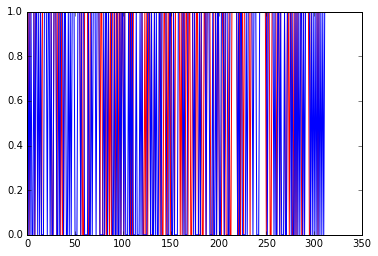

epoch 0 iter  0, loss: 345.43, accu: 0.48
epoch 0 iter  10, loss: 351.23, accu: 0.48
epoch 0 iter  20, loss: 357.30, accu: 0.48
epoch 0 iter  30, loss: 353.92, accu: 0.49
epoch 0 iter  40, loss: 353.32, accu: 0.48
epoch 0 iter  50, loss: 349.48, accu: 0.49
epoch 0 iter  60, loss: 348.82, accu: 0.48
epoch 0 iter  70, loss: 355.77, accu: 0.49
epoch 0 iter  80, loss: 354.58, accu: 0.48
epoch 0 iter  90, loss: 350.38, accu: 0.48
epoch 0 iter  100, loss: 338.62, accu: 0.48
epoch 0 iter  110, loss: 331.36, accu: 0.46
epoch 0 iter  120, loss: 330.76, accu: 0.49
epoch 0 iter  130, loss: 332.77, accu: 0.52
epoch 0 iter  140, loss: 331.12, accu: 0.52
epoch 0 iter  150, loss: 327.29, accu: 0.51
epoch 0 iter  160, loss: 327.52, accu: 0.51
epoch 0 iter  170, loss: 327.26, accu: 0.50
epoch 0 iter  180, loss: 325.99, accu: 0.50
epoch 1 iter  0, loss: 322.84, accu: 0.49
epoch 1 iter  10, loss: 324.29, accu: 0.47
epoch 1 iter  20, loss: 326.55, accu: 0.45
epoch 1 iter  30, loss: 323.44, accu: 0.49
epoc

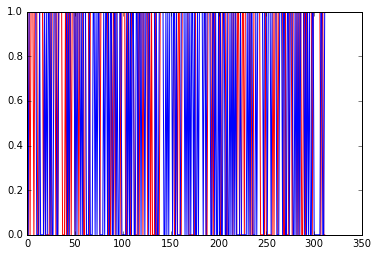

epoch 0 iter  0, loss: 260.33, accu: 0.50
epoch 0 iter  10, loss: 264.46, accu: 0.51
epoch 0 iter  20, loss: 266.58, accu: 0.51
epoch 0 iter  30, loss: 262.33, accu: 0.51
epoch 0 iter  40, loss: 258.67, accu: 0.51
epoch 0 iter  50, loss: 257.72, accu: 0.52
epoch 0 iter  60, loss: 258.51, accu: 0.52
epoch 0 iter  70, loss: 260.80, accu: 0.51
epoch 0 iter  80, loss: 261.00, accu: 0.51
epoch 0 iter  90, loss: 258.82, accu: 0.51
epoch 0 iter  100, loss: 257.92, accu: 0.51
epoch 0 iter  110, loss: 258.48, accu: 0.51
epoch 0 iter  120, loss: 261.46, accu: 0.50
epoch 0 iter  130, loss: 262.17, accu: 0.50
epoch 0 iter  140, loss: 258.72, accu: 0.49
epoch 0 iter  150, loss: 258.56, accu: 0.48
epoch 0 iter  160, loss: 260.76, accu: 0.46
epoch 0 iter  170, loss: 260.21, accu: 0.49
epoch 0 iter  180, loss: 262.00, accu: 0.52
epoch 1 iter  0, loss: 258.90, accu: 0.52
epoch 1 iter  10, loss: 257.52, accu: 0.48
epoch 1 iter  20, loss: 261.38, accu: 0.47
epoch 1 iter  30, loss: 260.26, accu: 0.47
epoc

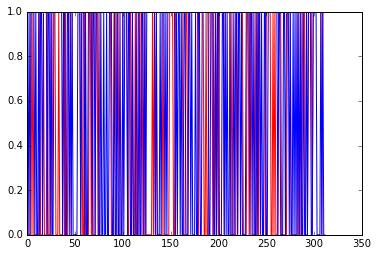

epoch 0 iter  0, loss: 284.93, accu: 0.50
epoch 0 iter  10, loss: 285.88, accu: 0.50
epoch 0 iter  20, loss: 285.37, accu: 0.48
epoch 0 iter  30, loss: 284.72, accu: 0.48
epoch 0 iter  40, loss: 281.78, accu: 0.48
epoch 0 iter  50, loss: 279.57, accu: 0.49
epoch 0 iter  60, loss: 279.52, accu: 0.51
epoch 0 iter  70, loss: 285.09, accu: 0.53
epoch 0 iter  80, loss: 284.25, accu: 0.54
epoch 0 iter  90, loss: 279.25, accu: 0.52
epoch 0 iter  100, loss: 280.68, accu: 0.50
epoch 0 iter  110, loss: 278.89, accu: 0.50
epoch 0 iter  120, loss: 277.30, accu: 0.51
epoch 0 iter  130, loss: 278.51, accu: 0.50
epoch 0 iter  140, loss: 277.85, accu: 0.49
epoch 0 iter  150, loss: 274.62, accu: 0.50
epoch 0 iter  160, loss: 276.22, accu: 0.48
epoch 0 iter  170, loss: 274.91, accu: 0.47
epoch 0 iter  180, loss: 265.48, accu: 0.53
epoch 1 iter  0, loss: 265.70, accu: 0.53
epoch 1 iter  10, loss: 268.14, accu: 0.53
epoch 1 iter  20, loss: 268.92, accu: 0.51
epoch 1 iter  30, loss: 267.68, accu: 0.51
epoc

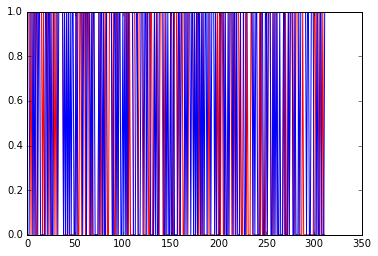

In [14]:
import tensorflow as tf 
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt
import random

embed_size = 100
stock_embeddings = tf.Variable(tf.random_uniform([len(good), embed_size], -1.0, 1.0))
stock_embedded = tf.nn.embedding_lookup(stock_embeddings, stock_id)

output_weights = tf.Variable(tf.random_normal([hidden_units, n_classes]))
output_bias = tf.Variable(tf.random_normal([n_classes]))

x = tf.placeholder("float", [None, time_steps, input_size])
y = tf.placeholder("float", [None, n_classes])

input_t = tf.unstack(x, time_steps, 1)
lstm_layer = rnn.BasicLSTMCell(hidden_units, forget_bias = 1, activation = tf.nn.relu)
outputs, final_state = rnn.static_rnn(lstm_layer, input_t, dtype = "float32")
prediction = tf.matmul(outputs[-1], output_weights) + output_bias
#prediction = tf.tanh(prediction)
#loss = tf.reduce_sum(tf.square(y-prediction)) / batch_size
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = prediction)
sum_loss = tf.reduce_sum(loss)
#opt = tf.train.AdamOptimizer(learning_rate = eta).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)
gvs = optimizer.compute_gradients(loss)
clipped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
opt = optimizer.apply_gradients(clipped_gvs)

dict_accu = {}
init = tf.global_variables_initializer()
batch_size = 5
with tf.Session() as sess:
    sess.run(init)
    for stock in good[:5]:
        train_set, test_batch_x, test_batch_y = process_data(stock)
        steps = int(len(train_set) / batch_size)
        for i in range(5):
            iter = 0
            random.shuffle(train_set)
            while iter < steps:
                batch_x, batch_y = next_batch(iter,batch_size,train_set)
                batch_x = batch_x.reshape((batch_size, time_steps, input_size))
                sess.run(opt, feed_dict = {x: batch_x, y: batch_y})

                if iter % 10 == 0:
                    #acc = sess.run(accuracy, feed_dict = {x: batch_x, y: batch_y})
                    los,pred = sess.run([sum_loss,prediction], feed_dict = {x:test_batch_x, y:test_batch_y})
                    move = [1 if x > 0 else 0 for x in pred]
                    accu = sum(int(x==y) for x,y in zip(move,test_batch_y)) / len(pred)
                    #confusion_matrix = tf.confusion_matrix()
                    #print("prediction", pred)
                    print("epoch %d iter % d, loss: %.2f, accu: %.2f" % (i,iter,los,accu))
                iter += 1

        test_result = sess.run(prediction, feed_dict = {x: test_batch_x})
        #print("test_prediction", test_result)
        move = [1 if x > 0 else 0 for x in test_result]
        confusion_matrix = sess.run(tf.confusion_matrix(test_batch_y,move,num_classes = 2))
        print(confusion_matrix)
        accu = sum(int(x==y) for x,y in zip(move,test_batch_y)) / len(test_result)
        dict_accu[stock] = accu
        print("epoch % d final accuracy %.2f" % (i,accu))
        axis = np.arange(0,len(test_result),1)
        plt.plot(axis, move,'r', label = "pred")
        plt.plot(axis, test_batch_y, 'b', label = "truth")

        #plt.legend()
        plt.show()



In [15]:
dict_accu

{'AAL_data.csv': 0.519650655021834,
 'ADBE_data.csv': 0.5544871794871795,
 'ADI_data.csv': 0.46474358974358976,
 'ADP_data.csv': 0.5128205128205128,
 'ADSK_data.csv': 0.5192307692307693}

In [16]:
l = [1,2,3]
s = [3,2,3,5,6,6]
h = s[:-1]
print(h)
sum(int(x==y) for x,y in zip(l,s))
j = l[4:]
print(j)

[3, 2, 3, 5, 6]
[]


In [17]:
np.log(5)

1.6094379124341003

In [18]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [19]:
sigmoid(-0.6)

0.35434369377420455